In [10]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.optim
# CODE FILES HERE
from main import Solver

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# for auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

# supress cluttering warnings in solutions
import warnings
warnings.filterwarnings('ignore')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [11]:
# setting device on GPU if available, else CPU
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print('Using device:', device)
print()

#Additional Info when using cuda
if device.type == 'cuda':
    print(torch.cuda.get_device_name(0))
    print('Memory Usage:')
    print('Allocated:', round(torch.cuda.memory_allocated(0)/1024**3,1), 'GB')
    print('Cached:   ', round(torch.cuda.memory_cached(0)/1024**3,1), 'GB')

Using device: cpu



In [120]:
# 2 layer networks for encoder and decoder
mnist_dim = 784
hidden_units = 500 # Kingma, Welling use 500 neurons, otherwise use 400
z_dim = 2 #20 1000 is suggested in the paper "Tutorial on VAE" but Kingma, Welling show 20 is sufficient for MNIST
learning_rate = 1e-3
optimizer = torch.optim.Adam
epochs = 1#0000

In [121]:
solver = Solver(optimizer, mnist_dim, hidden_units, z_dim, epochs, learning_rate)
solver.run()

====> Epoch: 1 train set loss avg: 187.5099
====> Test set loss avg: 183.3179
34.81628179550171 seconds for epoch 1
+++++ TRAINING FINISHED +++++


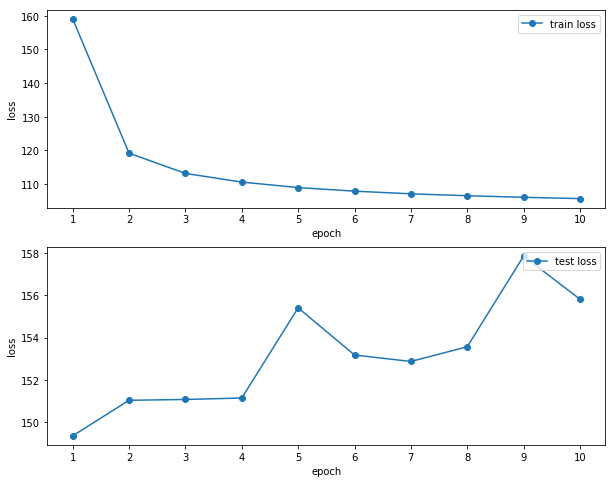

In [41]:
plt.subplot(2, 1, 1)
plt.plot(np.arange(1, len(solver.train_loss_history)+1), solver.train_loss_history, '-o')
plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend(['train loss'], loc='upper right')
plt.xticks(xaxis)

plt.subplot(2, 1, 2)
plt.plot(np.arange(1, len(solver.test_loss_history)+1), solver.test_loss_history, '-o')
plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend(['test loss'], loc='upper right')
plt.xticks(xaxis)

plt.show()

In [155]:
# visualize Q(z|X) like in https://wiseodd.github.io/techblog/2016/12/10/variational-autoencoder/
# TODO: need range for all labels so 0-9 and colour each according to that
# TODO: Need also latent space

from main import mnist_train, train_loader

labels = [] # 469 x 128
num_batches = len(train_loader) # 469
for idx, (data, target) in enumerate(train_loader):
    if idx == (len(train_loader)-1):
        break
    labels.append(target.numpy())

ls = solver.latent_space.detach().numpy()
pred = np.reshape(ls, (128*num_batches, 2))

plt.scatter(pred[:,0], pred[:,1], c=labels, cmap='hsv')
plt.colorbar();  # show color scale

ValueError: cannot reshape array of size 256 into shape (60032,2)